## Loading Data

I'll use preprocessed files that Markus provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data_path = r'../Data/speech_data/speech_train_set.csv'
val_data_path = r'../Data/speech_data/speech_validation_set.csv'
feature_path = r'../Data/speech_data/indixes_speech.csv'
print("Start Program")
dataset_train = pd.read_csv(train_data_path)
print("Loaded training set")
dataset_val = pd.read_csv(val_data_path)
print("Loaded validation set")
features = pd.read_csv(feature_path)
print("Loaded features")

Start Program
Loaded training set
Loaded validation set
Loaded features


In [3]:
print(dataset_train.shape)
print(dataset_val.shape)

(144388, 105)
(53129, 105)


### Shuffling and Undersampling

We undersample the positive class due to the huge class imbalance.

In [4]:
# Shuffle
dataset_train = dataset_train.sample(frac=1, random_state=0)
# extract target vector
y_train = np.array(dataset_train.iloc[:, -1])
# Undersampling
non_music = dataset_train[y_train == 0]
music = dataset_train[y_train == 1][:len(dataset_train[y_train == 0])]
dataset_train = music.append(non_music, ignore_index=True).sample(frac=1, random_state=0)
# get new-sized vector
y_train = np.array(dataset_train.iloc[:, -1])
y_val = np.array(dataset_val.iloc[:, -1])
print("Undersampled training data")
print(dataset_train.shape)

Undersampled training data
(144388, 105)


### Normalization

To make the features almost normally distributed. 

In [5]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_train_scaled = scaler.fit_transform(dataset_train.values)
dataset_val_scaled = scaler.transform(dataset_val.values)

### Load PCA

We later compare the results of using PCA to original features.

In [6]:
### Load PCA ###
import handsomUtility
X_train_pca, y_train_pca, X_val_pca, y_val_pca, X_test_pca, y_test_pca = handsomUtility.loadPCA()

Loaded PCA training set
Loaded PCA validation set
Loaded PCA test set


## Train on original features

In [7]:
features

,RF,SVM,RForSVM,RFandSVM
0,f000000,f000000,f000000,f000000
1,f000009,f000001,f000001,f000009
2,f000039,f000002,f000002,f000039
3,f000046,f000003,f000003,f000046
4,f000048,f000004,f000004,f000048
5,f000049,f000005,f000005,f000049
6,f000050,f000007,f000007,f000050
7,f000053,f000009,f000009,f000053
8,f000054,f000010,f000010,f000054
9,f000055,f000012,f000012,f000055


The first feature `f000000` is apparantly mistyped or something because there isn't such a feature. For the time being, I ignored it.

In [8]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score

|Training on RF
logistic_regression, profit = 17151.64000000238 [17191.6 17071.  17095.2 17105.6 17294.8]
Confusion Matrix: [0.52643566 0.011745   0.09115549 0.37066386]
Accuracy: 0.8970995125072936
Actual Profit (after learning): 22346.400000013575


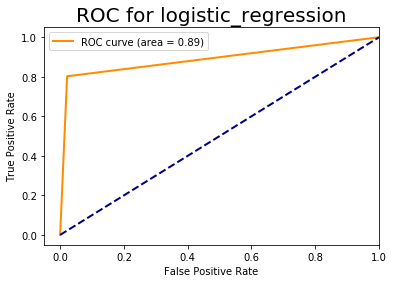

random_forest, profit = 18369.440000002545 [18385.8 18347.2 18403.6 18343.4 18367.2]
Confusion Matrix: [0.52555102 0.01262964 0.07146756 0.39035179]
Accuracy: 0.9159028026125092
Actual Profit (after learning): 24610.00000001436


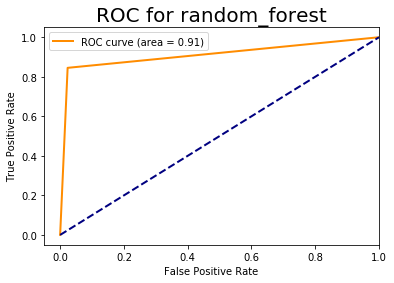

Neural Network, profit = 0.0 0
Confusion Matrix: [0.52669917 0.01148149 0.0917578  0.37006155]
Accuracy: 0.8967607144873798
Actual Profit (after learning): 22287.20000001354


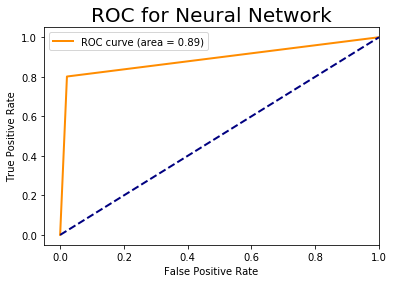

ensemble, profit = 17699.92000000247 [17758.  17645.6 17636.  17599.8 17860.2]
Confusion Matrix: [0.52594628 0.01223437 0.08917917 0.37264018]
Accuracy: 0.8985864593724707
Actual Profit (after learning): 22556.600000013663


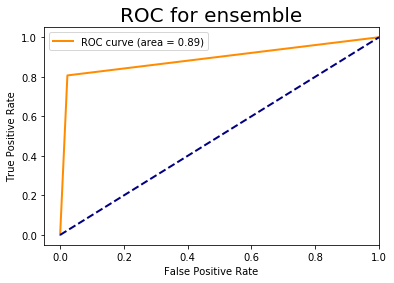





|Training on SVM
logistic_regression, profit = 17334.60000000242 [17376.  17220.6 17312.6 17297.2 17466.6]
Confusion Matrix: [0.52588982 0.01229084 0.08964972 0.37216962]
Accuracy: 0.8980594402303826
Actual Profit (after learning): 22499.20000001365


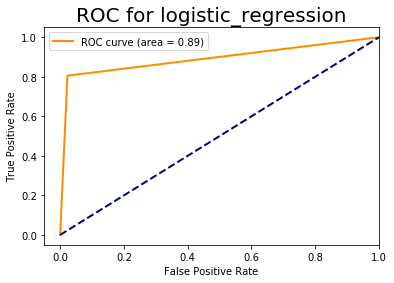

random_forest, profit = 18642.40000000259 [18697.2 18645.8 18678.2 18637.8 18553. ]
Confusion Matrix: [0.52551337 0.01266728 0.06535037 0.39646897]
Accuracy: 0.9219823448587401
Actual Profit (after learning): 25323.40000001458


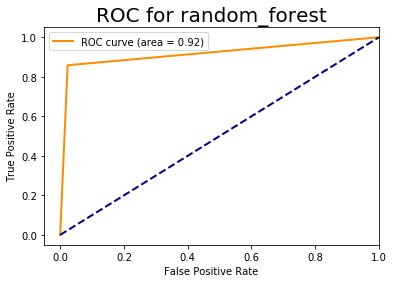

Neural Network, profit = 0.0 0
Confusion Matrix: [0.52556984 0.01261082 0.07739653 0.38442282]
Accuracy: 0.9099926593762352
Actual Profit (after learning): 23917.800000014133


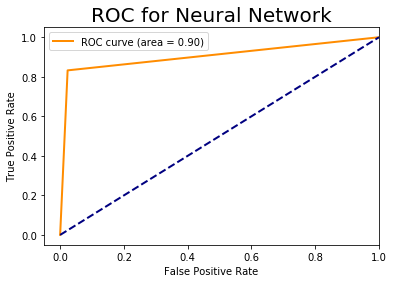

ensemble, profit = 18006.80000000252 [18045.2 17917.  17939.8 18013.4 18118.6]
Confusion Matrix: [0.52562631 0.01255435 0.06915244 0.39266691]
Accuracy: 0.9182932108641232
Actual Profit (after learning): 24883.800000014442


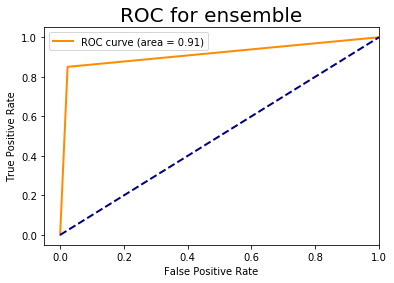





|Training on RForSVM
logistic_regression, profit = 17334.60000000242 [17376.  17220.6 17312.6 17297.2 17466.6]
Confusion Matrix: [0.52588982 0.01229084 0.08964972 0.37216962]
Accuracy: 0.8980594402303826
Actual Profit (after learning): 22499.20000001365


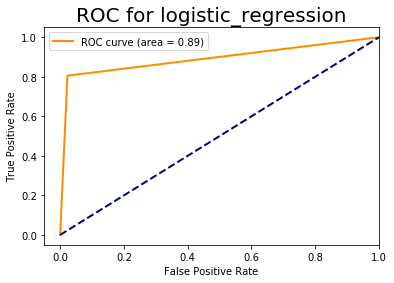

random_forest, profit = 18642.84000000259 [18697.2 18648.  18678.2 18637.8 18553. ]
Confusion Matrix: [0.52551337 0.01266728 0.06535037 0.39646897]
Accuracy: 0.9219823448587401
Actual Profit (after learning): 25323.40000001458


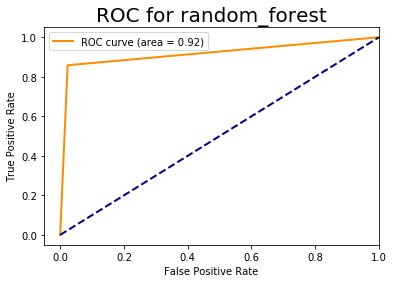

Neural Network, profit = 0.0 0
Confusion Matrix: [0.52556984 0.01261082 0.07739653 0.38442282]
Accuracy: 0.9099926593762352
Actual Profit (after learning): 23917.800000014133


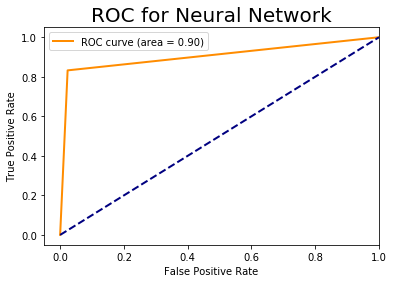

ensemble, profit = 18006.80000000252 [18045.2 17917.  17939.8 18013.4 18118.6]
Confusion Matrix: [0.52562631 0.01255435 0.06915244 0.39266691]
Accuracy: 0.9182932108641232
Actual Profit (after learning): 24883.800000014442


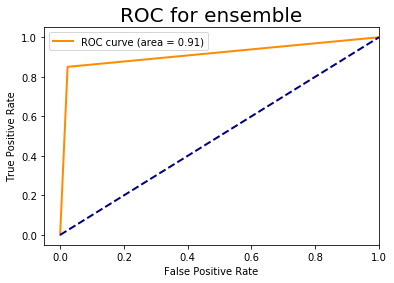





|Training on RFandSVM
logistic_regression, profit = 17151.64000000238 [17191.6 17071.  17095.2 17105.6 17294.8]
Confusion Matrix: [0.52643566 0.011745   0.09115549 0.37066386]
Accuracy: 0.8970995125072936
Actual Profit (after learning): 22346.400000013575


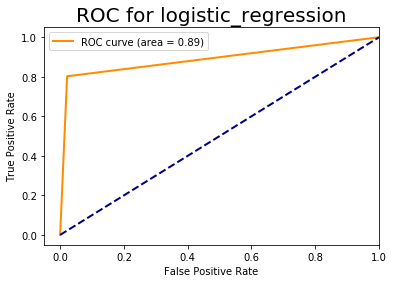

random_forest, profit = 18369.440000002545 [18385.8 18347.2 18403.6 18343.4 18367.2]
Confusion Matrix: [0.52555102 0.01262964 0.07146756 0.39035179]
Accuracy: 0.9159028026125092
Actual Profit (after learning): 24610.00000001436


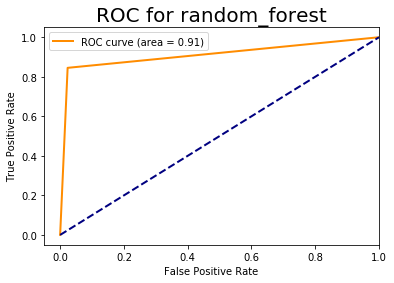

Neural Network, profit = 0.0 0
Confusion Matrix: [0.52669917 0.01148149 0.0917578  0.37006155]
Accuracy: 0.8967607144873798
Actual Profit (after learning): 22287.20000001354


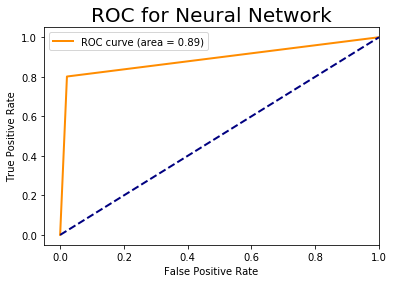

ensemble, profit = 17699.92000000247 [17758.  17645.6 17636.  17599.8 17860.2]
Confusion Matrix: [0.52594628 0.01223437 0.08917917 0.37264018]
Accuracy: 0.8985864593724707
Actual Profit (after learning): 22556.600000013663


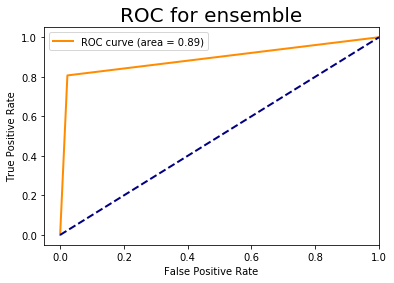

In [9]:
tables = []
for column in features:
    f = features[column].dropna().tolist()
    # add one to each feature index
#     f = ["f{:06}".format(int(re.findall(r"\d+", feature)[0])+1) for feature in f]
    # remove the first feature, because there isn't such f000001
    f = f[1:]
    print("===============================")
    print("|Training on {}".format(column))
    print("===============================")
    X_train = dataset_train[f].values
    X_val = dataset_val[f].values
    
    results = {}
    # for all four model types, train on the selected features
    for classifier, name in handsomUtility.getClassifiers():
        classifier.fit(X_train, y_train)
        y_pred = handsomUtility.post_processing(classifier.predict(X_val))
        # except Neural Network, becaus they don't reach convergence
        profit = cross_val_score(classifier, X_train, y_train, cv=5, scoring=make_scorer(handsomUtility.profit_score), error_score = "raise") if name != 'Neural Network' else 0
        accuracy = accuracy_score(y_val, y_pred)
        print("{}, profit = {} {}".format(name, np.mean(profit), profit))
        cm = confusion_matrix(y_val, y_pred).ravel()/len(y_pred)
        print("Confusion Matrix: {}".format(cm))
        print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))
        print("Actual Profit (after learning): {}".format(handsomUtility.profit_score(y_val, y_pred)))
        auc = handsomUtility.plotROC(y_val, y_pred, name)
        results[name] = {'accuracy': accuracy, 'AUC': auc, 'expected profit': np.mean(profit), 'actual profit': handsomUtility.profit_score(y_val, y_pred), 'TPR':cm[0], 'FPR':cm[1], 'FNR':cm[2], 'TNR':cm[3]}
    print('\n\n\n')
    tables.append(results)

## Examining Results

Now let's examine which classifier performed the best among all feature selection optins. In the excel sheets in `SpeechClassifier`, you can find highlited values.

In [32]:
def highlight_max(s):
    '''highlight the maximum in a Series lightgreen.'''
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]
def highlight_min(s):
    '''highlight the maximum in a Series lightred.'''
    is_min = s == s.min()
    return ['background-color: lightred' if v else '' for v in is_min]

In [34]:
from IPython.display import display
for i in range(len(tables)):
    df = pd.DataFrame.from_dict(tables[i], orient='index')
    df.to_csv("../SpeechClassifier/metrics-{}.csv".format(list(features.columns.values)[i]), sep=',', encoding='utf-8')
    display(df.style.apply(highlight_max).set_caption(list(features.columns.values)[i]))

,accuracy,AUC,expected profit,actual profit,TPR,FPR,FNR,TNG
Neural Network,0.896761,0.889989,0,22287.2,0.526699,0.0114815,0.0917578,0.370062
ensemble,0.898586,0.892082,17699.9,22556.6,0.525946,0.0122344,0.0891792,0.37264
logistic_regression,0.8971,0.890397,17151.6,22346.4,0.526436,0.011745,0.0911555,0.370664
random_forest,0.915903,0.91089,18369.4,24610,0.525551,0.0126296,0.0714676,0.390352


,accuracy,AUC,expected profit,actual profit,TPR,FPR,FNR,TNG
Neural Network,0.909993,0.904489,0,23917.8,0.52557,0.0126108,0.0773965,0.384423
ensemble,0.918293,0.913467,18006.8,24883.8,0.525626,0.0125543,0.0691524,0.392667
logistic_regression,0.898059,0.89152,17334.6,22499.2,0.52589,0.0122908,0.0896497,0.37217
random_forest,0.921982,0.917478,18642.4,25323.4,0.525513,0.0126673,0.0653504,0.396469


,accuracy,AUC,expected profit,actual profit,TPR,FPR,FNR,TNG
Neural Network,0.909993,0.904489,0,23917.8,0.52557,0.0126108,0.0773965,0.384423
ensemble,0.918293,0.913467,18006.8,24883.8,0.525626,0.0125543,0.0691524,0.392667
logistic_regression,0.898059,0.89152,17334.6,22499.2,0.52589,0.0122908,0.0896497,0.37217
random_forest,0.921982,0.917478,18642.8,25323.4,0.525513,0.0126673,0.0653504,0.396469


,accuracy,AUC,expected profit,actual profit,TPR,FPR,FNR,TNG
Neural Network,0.896761,0.889989,0,22287.2,0.526699,0.0114815,0.0917578,0.370062
ensemble,0.898586,0.892082,17699.9,22556.6,0.525946,0.0122344,0.0891792,0.37264
logistic_regression,0.8971,0.890397,17151.6,22346.4,0.526436,0.011745,0.0911555,0.370664
random_forest,0.915903,0.91089,18369.4,24610,0.525551,0.0126296,0.0714676,0.390352


It looks like random forest has performed the best out of all possible combinations, not ensemble. 

Here we analyze the best out of the best scoring models

In [44]:
best_of_best = {}
for i in range(len(tables)):
    best_of_best["random_forest ({})".format(list(features.columns.values)[i])] = tables[i]["random_forest"]
pd.DataFrame.from_dict(best_of_best, orient='index').style.apply(highlight_max).set_caption("Best out of Best")

,accuracy,AUC,expected profit,actual profit,TPR,FPR,FNR,TNG
random_forest (RF),0.915903,0.91089,18369.4,24610,0.525551,0.0126296,0.0714676,0.390352
random_forest (RFandSVM),0.915903,0.91089,18369.4,24610,0.525551,0.0126296,0.0714676,0.390352
random_forest (RForSVM),0.921982,0.917478,18642.8,25323.4,0.525513,0.0126673,0.0653504,0.396469
random_forest (SVM),0.921982,0.917478,18642.4,25323.4,0.525513,0.0126673,0.0653504,0.396469


## Train on PCA

And now the last step is to compare it to principle components

logistic_regression, profit = 17457.200000002405 [17397.2 17456.  17371.6 17516.2 17545. ]
Confusion Matrix: [0.52656741 0.01161324 0.07741535 0.384404  ]
Accuracy: 0.9109714092115417
Actual Profit (after learning): 23958.00000001409


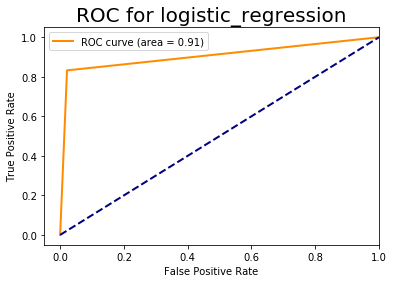

random_forest, profit = 18358.00000000266 [18223.  18334.  18319.6 18415.  18498.4]
Confusion Matrix: [0.52506164 0.01311901 0.06871953 0.39309981]
Accuracy: 0.9181614560786011
Actual Profit (after learning): 24910.40000001446


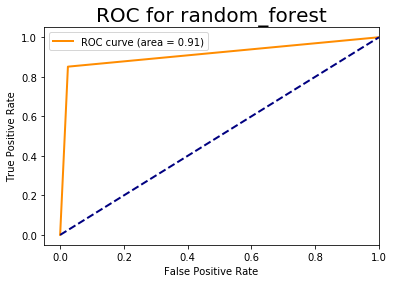

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network, profit = 0.0 0
Confusion Matrix: [0.52587099 0.01230966 0.06909597 0.39272337]
Accuracy: 0.9185943646596021
Actual Profit (after learning): 24900.800000014435


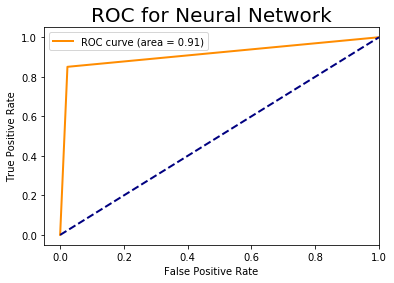

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

ensemble, profit = 18557.800000002597 [18478.4 18531.  18455.8 18618.8 18705. ]
Confusion Matrix: [0.52581453 0.01236613 0.06839956 0.39341979]
Accuracy: 0.9192343164749949
Actual Profit (after learning): 24979.80000001446


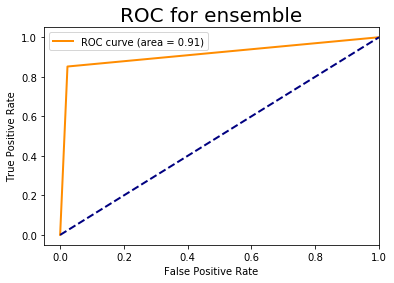

In [15]:
table_pca = {}
for classifier, name in handsomUtility.getClassifiers():
    classifier.fit(X_train_pca, y_train_pca)
    y_pred = handsomUtility.post_processing(classifier.predict(X_val_pca))
    # except Neural Network, becaus they don't reach convergence
    profit = cross_val_score(classifier, X_train_pca, y_train_pca, cv=5, scoring=make_scorer(handsomUtility.profit_score), error_score="raise") if name != 'Neural Network' else 0
    accuracy = accuracy_score(y_val_pca, y_pred)
    print("{}, profit = {} {}".format(name, np.mean(profit), profit))
    cm = confusion_matrix(y_val, y_pred).ravel()/len(y_pred)
    print("Confusion Matrix: {}".format(cm))
    print("Accuracy: {}".format(accuracy_score(y_val_pca, y_pred)))
    print("Actual Profit (after learning): {}".format(handsomUtility.profit_score(y_val_pca, y_pred)))
    auc = handsomUtility.plotROC(y_val_pca, y_pred, name)
    table_pca[name] = {'accuracy': accuracy, 'AUC': auc, 'expected profit': np.mean(profit), 'actual profit': handsomUtility.profit_score(y_val, y_pred), 'TPR':cm[0], 'FPR':cm[1], 'FNR':cm[2], 'TNG':cm[3]}

### Examining PCA

Here we examine the results of PCA, to find out if it compares to original features.

In [45]:
df = pd.DataFrame.from_dict(table_pca, orient='index')
df.to_csv("../SpeechClassifier/metrics-PCA.csv", sep=',', encoding='utf-8')
df.style.apply(highlight_max).set_caption("PCA")

,accuracy,AUC,expected profit,actual profit,TPR,FPR,FNR,TNG
Neural Network,0.918594,0.913755,0,24900.8,0.525871,0.0123097,0.069096,0.392723
ensemble,0.919234,0.914457,18557.8,24979.8,0.525815,0.0123661,0.0683996,0.39342
logistic_regression,0.910971,0.905395,17457.2,23958,0.526567,0.0116132,0.0774153,0.384404
random_forest,0.918161,0.913411,18358,24910.4,0.525062,0.013119,0.0687195,0.3931


Here we can see that on PC, the best classifier was the ensemble, that used the majority vote, followed by Neural Network. However, as we compare the results (especially the profit actual profit), we can see that random forest outperforms it on original features.